# Background Substarction for Detection and Tracking Example

In the following example with the sample video the movement should be detected frame by frame.

All the background substraction parameters are in config.py file.

First of all, all the required liberaries should be imported.

In [3]:
%cd ..\.. 
# only if you run it from the sub directory
from utils import resize
from background_substraction import BG_substractor

C:\Users\yasin\Documents\Codes\Joss_examples\Offline_MOT


In [4]:
import numpy as np 
import cv2 

Now the sample video should be read with a video reader object from Opencv liberary

In [5]:
cap = cv2.VideoCapture('docs/sample.mp4')
ret, bg = cap.read() # read the first frame

The first frame is considered the default background in the start to compare it with the next frames in the video in order to detect the motion.

In the case where we want start the movement detection at some later frame, not the first one. We could write

In [6]:
frame_id = 1 # the frame that should we start from
cap.set(1, frame_id-1)

True

Then we intilize the background substarctor object

In [7]:
BG_s = BG_substractor(bg)
ret, frame = cap.read()

# Main loop
Now everything are ready to start the background substarction loop.
The result will be shown in a new window

The video will keep running until you hit **ESC** or the video end

In [22]:
while ret:
    frame_id += 1
    
    I_com = BG_s.bg_substract(frame)
    
    cv2.imshow('fgmask', resize(I_com,0.2)) 
    
    #print(frame_id)
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
    ret, frame = cap.read()

cap.release() 
cv2.destroyAllWindows() 

As it was shown, the result has some problems, 
The moving cyclists are detected but not perfectly. Additionally the trees and part of the road are detected as moving objects.


A resonable step would be to filter the video from the small noisy objects by deleting the small blobs. we can test that using other method of the class, namely: 
`get_big_objects`


In [8]:
cap = cv2.VideoCapture('docs/sample.mp4')
ret, bg = cap.read() # read the first frame

BG_s = BG_substractor(bg)
ret, frame = cap.read()

while ret:
    frame_id += 1
    
    I_com = BG_s.bg_substract(frame)
    # filter small objects
    I_com, _ = BG_s.get_big_objects(I_com,frame)
    
    cv2.imshow('fgmask', resize(I_com,0.2)) 
    
    if frame_id == 30:
        frame_2_save = resize(I_com).copy()
    #print(frame_id)
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
    ret, frame = cap.read()

cap.release() 
cv2.destroyAllWindows() 

Finally we can view the result at step 30, as follows:

In [9]:
%matplotlib inline

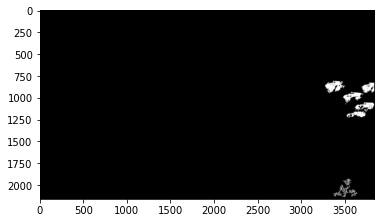

In [10]:
import matplotlib.pyplot as plt
plt.imshow(frame_2_save)

This final result shows much better results (although  there is still some noise from the moving trees but it is smaller)